### Part 1

**Minkowski Metric**

We will now implement the Manhattan, Euclidian and Chebyshev distance metrics as defined below

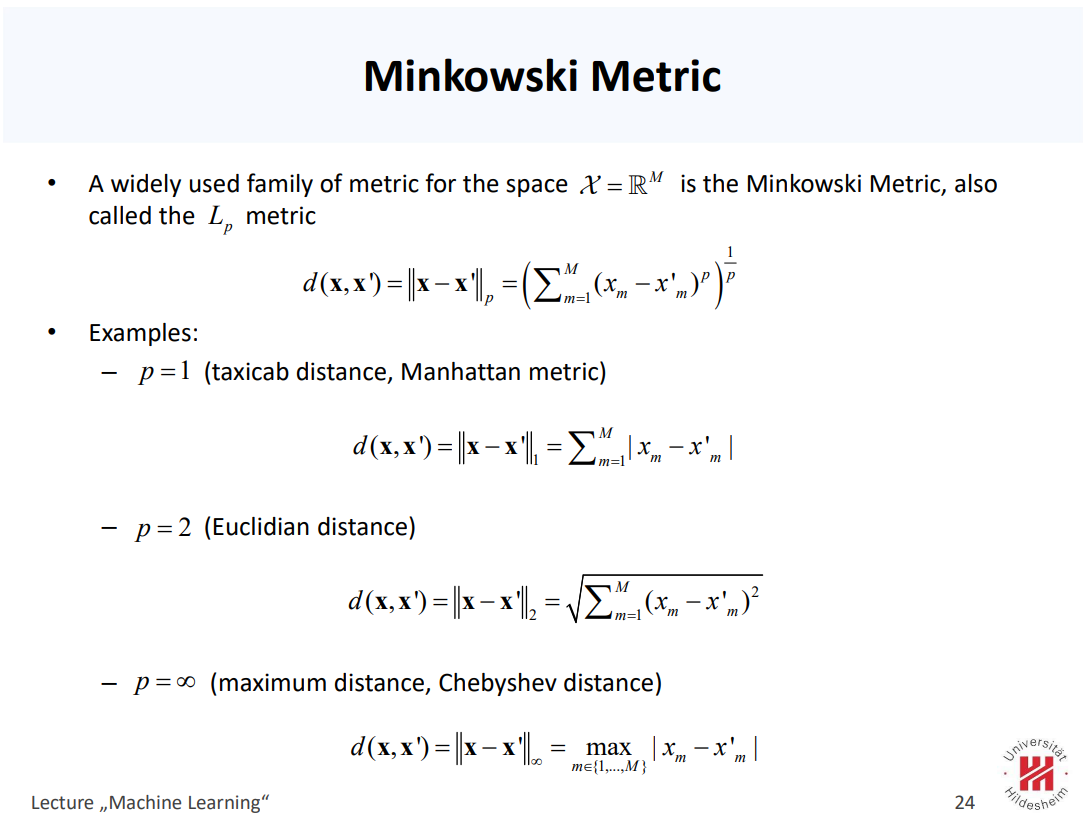

In [83]:
import numpy as np
import math

def manhattan_dist(v1, v2):

    return np.sum(abs(v1-v2)) 

def euclidian_dist(v1, v2):

    return np.sqrt(np.sum((v1 - v2)**2))

def chebyshev_dist(v1, v2):

    return max(abs(v1-v2))

X_1 = np.array([1,3,4])
X_2 = np.array([2,4,1])

print(manhattan_dist(X_1,X_2))
print(euclidian_dist(X_1,X_2))
print(chebyshev_dist(X_1,X_2))


5
3.3166247903554
3


### Part 2

**K-Nearest Neighbor Classifier**

For this part, you need to implement a K-Nearest Neighbor Classifier, the basic algorithm is given by:

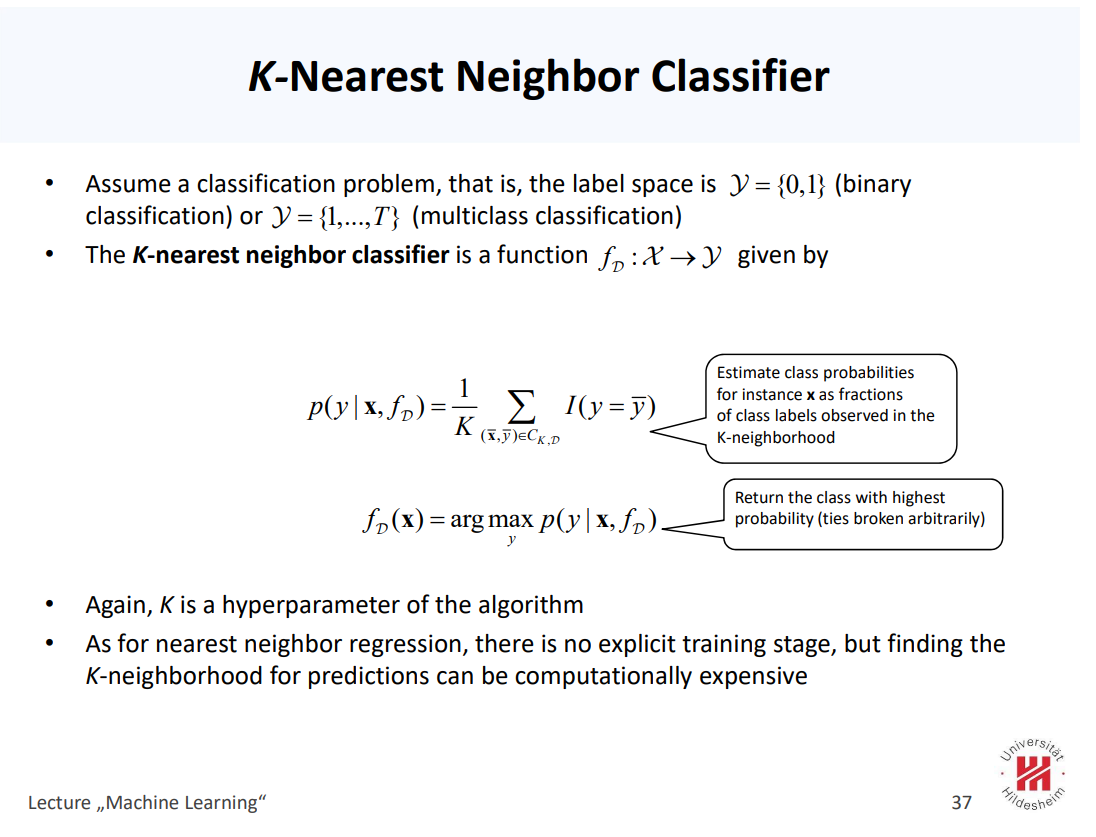


You need to use the iris dataset (from sklearn) for this task.
- Divide the dataset into train, validation and test using 70-20-10 ratio.
- Perform standard scaling of the dataset. *(Hint: store the original mean and std of features for later use)*
- The algorithm should work with Manhattan, Euclidian and Chebyshev distance metrics
- Do a hyperparameter search over different values of *K* and the distance metrics using the train and validation datasets. 
- Once the best model is found (compare models based on f1-score), report the test results for that model (precision, recall and f1-score). **Note you need to create scoring functions from scartch and NOT use the pre-defined functions from sklearn.**
- Train your model once more by combining both train and validation datasets for training (with the best hyperparameters). Compare the results with the model trained on just train split. Comment if there's a difference.

**Note: You are only allowed to use sklearn to read the iris dataset. The rest of the code should be in Numpy**

In [84]:
import numpy as np
import matplotlib.pyplot as plt 
import pandas as pd
from collections import Counter
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

class my_KNN:

    def __init__(self, k=3, metric = 'euclidian'):
        
        self.k=k
        self.metric = metric
        self.distance_func = self.distance_calc

    def distance_calc(self):

        if self.metric == 'manhattan':
            return manhattan_dist
        elif self.metric == 'euclidian':
            return euclidian_dist
        elif self.metric == 'chebyshev':
            return chebyshev_dist

    def fit(self, X, y):

        self.X_train = X
        self.Y_train = y

    def predict(self, X):
        predictions = [self.predict_(x) for x in X]
        return predictions

    def predict_(self, x):

        distances = [euclidian_dist(x_train,x) for x_train in self.X_train]
        k_indices = np.argsort(distances)[:self.k]
        k_labels = [self.Y_train[i] for i in k_indices]
        most_common = Counter(k_labels).most_common()
        return most_common[0][0] 


In [85]:
# Loading the Iris dataset

iris = load_iris()
X = iris.data
y = iris.target

x_train, x_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, shuffle=True)
x_val, x_test, y_val, y_test = train_test_split(x_temp, y_temp, test_size=1/3, shuffle=True)

#Running algorithm  
model = my_KNN(k=5)
model.fit(x_train,y_train)
y_pred = model.predict(x_test)
print(y_pred)

[1, 1, 2, 2, 0, 2, 1, 0, 0, 2, 0, 0, 2, 2, 1]


In [86]:
# Performing standard scaling to dataset
x_scaled=X.copy()

for col in range(X.shape[1]):

    mean_x = np.mean(X[:,col])
    std_x = np.std(X[:,col])
    x_scaled[:,col] = (X[:,col]-mean_x)/std_x

x_train_s, x_temp_s, y_train_s, y_temp_s = train_test_split(x_scaled, y, test_size=0.3, shuffle=True)
x_val_s, x_test_s, y_val_s, y_test_s = train_test_split(x_temp_s, y_temp_s, test_size=1/3, shuffle=True)

In [87]:
def f1_calc(y_true, y_pred):

    tp = sum((a == b) for a, b in zip(y_true, y_pred))
    fp = sum((a != b) for a, b in zip(y_true, y_pred))

    # Calculate precision and recall 
    precision = tp / (tp + fp) if (tp + fp) != 0 else 0
    recall = tp / (tp + fp) if (tp + fp) != 0 else 0

    # Calculate micro-averaged F1 score
    f1 = 2 * (precision * recall) / (precision + recall) if (precision + recall) != 0 else 0

    return f1

In [88]:
# hyperparameters to optimize
k_values = [3, 4, 5, 6]  # Values of K
metric_values = ['euclidian', 'manhattan', 'chebyshev']  # Distance metrics

best_accuracy = 0
best_params = {}

# Iterate over the hyperparameter combinations
for k in k_values:
    for metric in metric_values:
        # Create a KNN classifier with the current hyperparameters
        knn = my_KNN(k=k, metric=metric)
        
        # Fit the model on the training data
        knn.fit(x_train_s, y_train_s)
        
        # Make predictions on the validation data
        y_val_pred = knn.predict(x_val_s)
        
        # Calculate accuracy
        accuracy = f1_calc(y_val_s, y_val_pred)
        
        # Print the current hyperparameters and accuracy
        print(f"K: {k}, Metric: {metric}, Accuracy: {accuracy}")
        
        # Update the best parameters if the current model is better
        if accuracy > best_accuracy:
            best_accuracy = accuracy
            best_params = {'n_neighbors': k, 'metric': metric}

# Print the best hyperparameters
print("\nBest Hyperparameters:", best_params)
print("Best Accuracy:", best_accuracy)


K: 3, Metric: euclidian, Accuracy: 1.0
K: 3, Metric: manhattan, Accuracy: 1.0
K: 3, Metric: chebyshev, Accuracy: 1.0
K: 4, Metric: euclidian, Accuracy: 1.0
K: 4, Metric: manhattan, Accuracy: 1.0
K: 4, Metric: chebyshev, Accuracy: 1.0
K: 5, Metric: euclidian, Accuracy: 1.0
K: 5, Metric: manhattan, Accuracy: 1.0
K: 5, Metric: chebyshev, Accuracy: 1.0
K: 6, Metric: euclidian, Accuracy: 1.0
K: 6, Metric: manhattan, Accuracy: 1.0
K: 6, Metric: chebyshev, Accuracy: 1.0

Best Hyperparameters: {'n_neighbors': 3, 'metric': 'euclidian'}
Best Accuracy: 1.0


In [89]:

train_x, test_x, train_y, test_y = train_test_split(scaled_x, y, test_size=0.1, shuffle=True)

model = my_KNN(k=5, metric='euclidian')
model.fit(train_x,train_y)
pred_y = model.predict(test_x)
print(f1_calc(pred_y,test_y))

1.0


**Visualization**

You need to visualize the decision boundaries for the best k-NN classifier for all combination of features. As there are 4 features, we would get 6 plots. (F1xF2, F1xF3, F1xF4, F2xF3, F2xF4 and F3xF4). The plots should look like the given example. Please appropriately label the axes of all figures.

*You need to visualize the data in the **original feature space**, for this purpose, you need to descale the data after classifying the gridmesh* $$z ={x_{scaled} \times {\text{std}(x_{orig})}+\text{mean}(x_{orig})}$$

Color scheme for all 6 plots should be consistent.

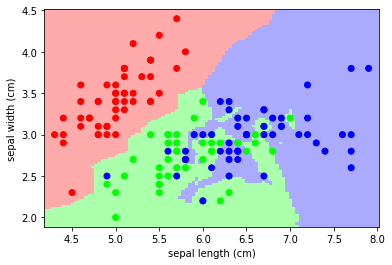

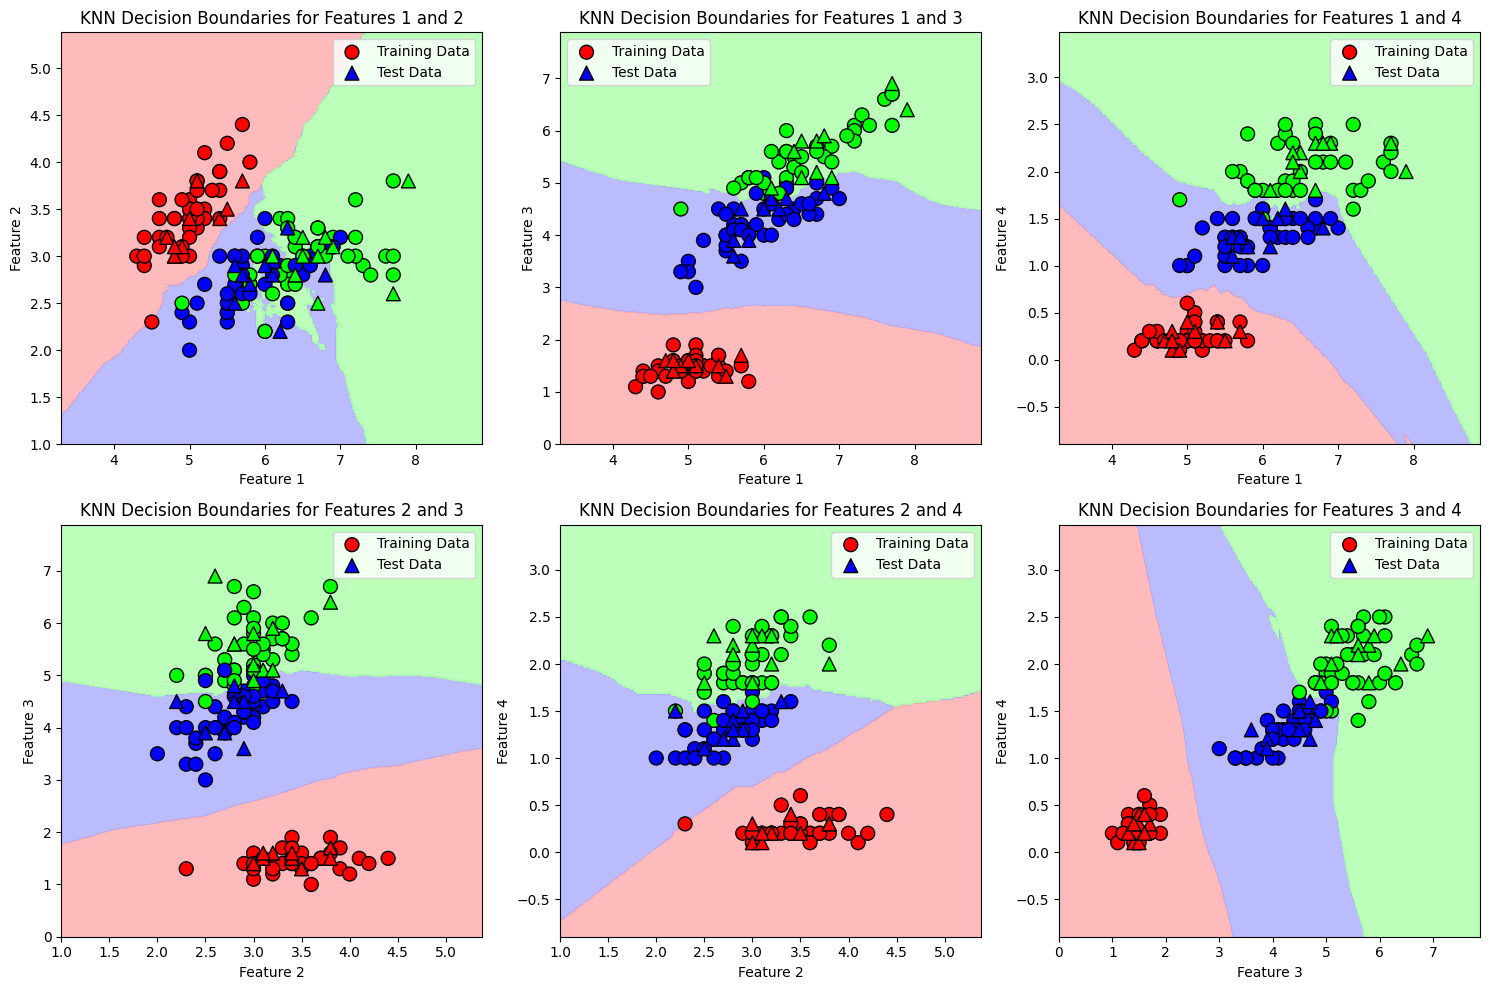

In [90]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from matplotlib.colors import ListedColormap

# all possible pairs of features
feature_pairs = [(0, 1), (0, 2), (0, 3), (1, 2), (1, 3), (2, 3)]

# Creating subplots
fig, axes = plt.subplots(2, 3, figsize=(15, 10))

# Training a KNN classifier for each feature pair and plot decision boundaries
for pair, ax in zip(feature_pairs, axes.flatten()):
    feature1, feature2 = pair
    X_pair = X[:, [feature1, feature2]]
    X_train, X_test, y_train, y_test = train_test_split(X_pair, y, test_size=0.2, random_state=42)

 
    knn = my_KNN(k=5)
    knn.fit(X_train, y_train)

    # decision boundaries
    h = 0.02  # step size in the mesh
    x_min, x_max = X_pair[:, 0].min() - 1, X_pair[:, 0].max() + 1
    y_min, y_max = X_pair[:, 1].min() - 1, X_pair[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])

    # Color map
    cmap_background = ListedColormap(['#FFAAAA', '#AAAAFF', '#AAFFAA'])
    cmap_points = ListedColormap(['#FF0000', '#0000FF', '#00FF00'])

    # Plot the decision boundaries
    Z = np.array(Z).reshape(xx.shape)
    ax.contourf(xx, yy, Z, cmap=cmap_background, alpha=0.8)

    # Plot of training points
    ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cmap_points, edgecolors='k', marker='o', s=100, label='Training Data')

    # Plot of test points
    ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cmap_points, edgecolors='k', marker='^', s=100, label='Test Data')

    # Set plot labels and title
    ax.set_xlabel(f'Feature {feature1 + 1}')
    ax.set_ylabel(f'Feature {feature2 + 1}')
    ax.set_title(f'KNN Decision Boundaries for Features {feature1 + 1} and {feature2 + 1}')
    ax.legend()

plt.tight_layout()
plt.show()
